In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Read CSV file
df = pd.read_csv('sales_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

Saving sales_data.csv to sales_data (1).csv
  flag gender        education  house_val     age online marriage child  \
0    Y      M          4. Grad     756460   1_Unk      N      NaN     U   
1    N      F          3. Bach     213171   7_>65      N      NaN     U   
2    N      M  2. Some College     111147  2_<=25      Y      NaN     Y   
3    Y      M  2. Some College     354151  2_<=25      Y   Single     U   
4    Y      F  2. Some College     117087   1_Unk      Y  Married     Y   

      occupation mortgage house_owner     region fam_income  
0   Professional     1Low         NaN    Midwest          L  
1   Professional     1Low       Owner  Northeast          G  
2   Professional     1Low       Owner    Midwest          J  
3  Sales/Service     1Low         NaN       West          L  
4  Sales/Service     1Low         NaN      South          H  


In [ ]:
# Now you can proceed with describing the data
description = df.describe(include='all')
print("\nData Description:")
print(description)


Data Description:
         flag gender        education     house_val     age online marriage  \
count   40000  40000            39259  4.000000e+04   40000  40000    25973   
unique      2      3                5           NaN       7      2        2   
top         Y      M  2. Some College           NaN  5_<=55      Y  Married   
freq    20000  22019            11400           NaN    8103  27319    20891   
mean      NaN    NaN              NaN  3.072138e+05     NaN    NaN      NaN   
std       NaN    NaN              NaN  4.222146e+05     NaN    NaN      NaN   
min       NaN    NaN              NaN  0.000000e+00     NaN    NaN      NaN   
25%       NaN    NaN              NaN  8.065725e+04     NaN    NaN      NaN   
50%       NaN    NaN              NaN  2.148720e+05     NaN    NaN      NaN   
75%       NaN    NaN              NaN  3.937620e+05     NaN    NaN      NaN   
max       NaN    NaN              NaN  9.999999e+06     NaN    NaN      NaN   

        child    occupation mort

Missing Information:
flag               0
gender             0
education        741
house_val          0
age                0
online             0
marriage       14027
child              0
occupation         0
mortgage           0
house_owner     3377
region             0
fam_income         0
dtype: int64
Missing Information(%):
flag            0.0000
gender          0.0000
education       1.8525
house_val       0.0000
age             0.0000
online          0.0000
marriage       35.0675
child           0.0000
occupation      0.0000
mortgage        0.0000
house_owner     8.4425
region          0.0000
fam_income      0.0000
dtype: float64


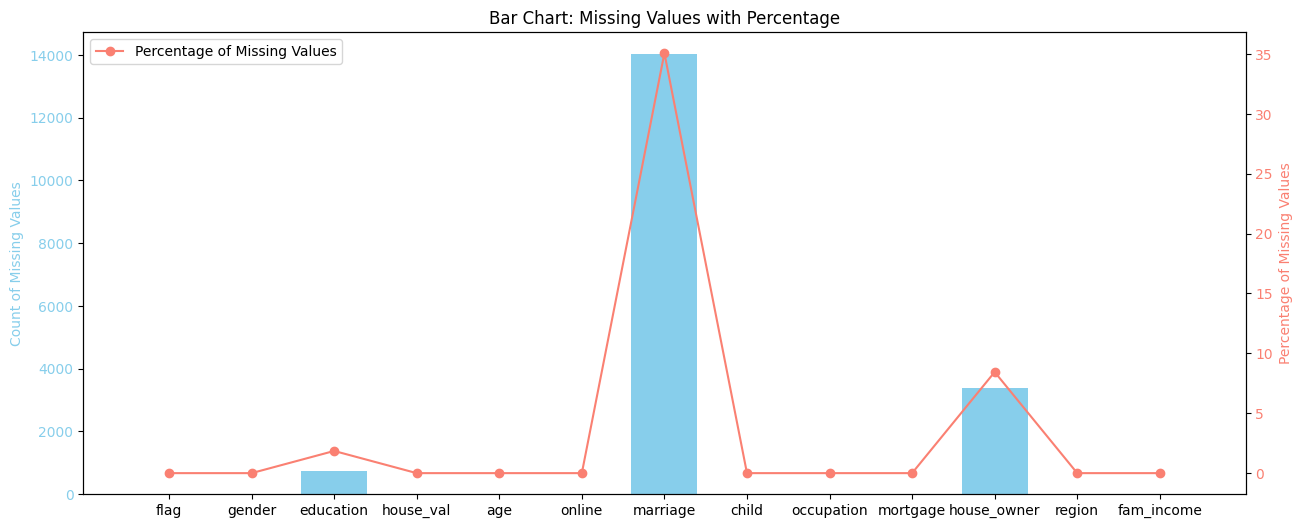

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Missing information
missing_info = df.isnull().sum()
print("Missing Information:")
print(missing_info)

# Calculate missing percentage
missing_percentage = 100 * df.isnull().sum() / len(df)
print("Missing Information(%):")
print(missing_percentage)

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 6))

# Actual count of missing values (left y-axis)
color = 'skyblue'
ax1.bar(df.columns, df.isnull().sum(), color=color, label='Count of Missing Values')
ax1.set_ylabel('Count of Missing Values', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Percentage of missing values (right y-axis)
ax2 = ax1.twinx()
color = 'salmon'
ax2.plot(df.columns, missing_percentage, color=color, marker='o', label='Percentage of Missing Values')
ax2.set_ylabel('Percentage of Missing Values', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and labels
plt.title('Bar Chart: Missing Values with Percentage')
plt.xlabel('Variables')
plt.legend(loc='upper left')

plt.show()

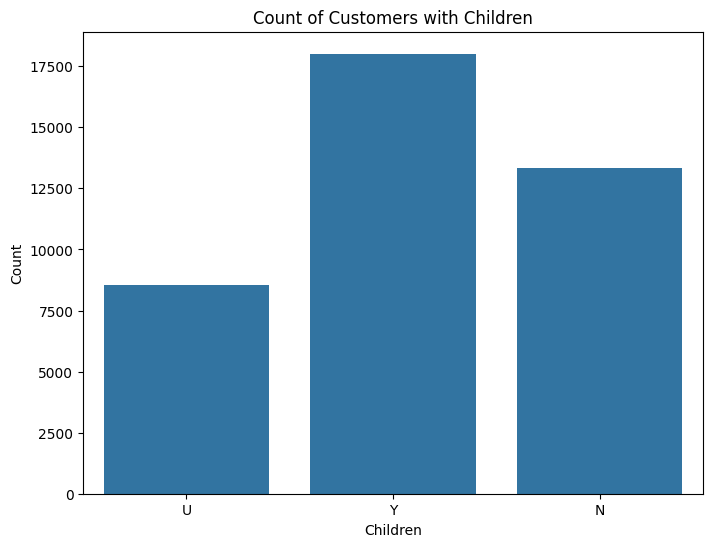

In [ ]:
# Replace values in 'Gender' column
# Filter out rows where the 'child' column is not equal to '0'
filtered_data = df[df['child'] != '0']

# Plot the bar plot without the '0' section
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_data, x='child')
plt.title("Count of Customers with Children")
plt.xlabel("Children")
plt.ylabel("Count")
plt.show()

# Convert missing values to NaN
df.replace('#VALUE!', np.nan, inplace=True)
df.replace('',np.nan,inplace=True)

In [ ]:
from scipy.stats import trim_mean
df_impute=df.copy()

# Import pandas
import pandas as pd

# Impute 'Education' with unknown
df_impute['education'].fillna('unknown', inplace=True)

# Impute 'Marriage' with unknown
df_impute['marriage'].fillna('unknown', inplace=True)

# Impute 'house_owner' with unknown
df_impute['house_owner'].fillna('unknown', inplace=True)



# Check if there are any missing values left
print("Remaining missing values:")
print(df_impute.isnull().sum())

# Display the DataFrame after imputation
print("DataFrame after imputation:")
print(df_impute.describe(include='all'))

Remaining missing values:
flag           0
gender         0
education      0
house_val      0
age            0
online         0
marriage       0
child          0
occupation     0
mortgage       0
house_owner    0
region         0
fam_income     0
dtype: int64
DataFrame after imputation:
         flag gender        education     house_val     age online marriage  \
count   40000  40000            40000  4.000000e+04   40000  40000    40000   
unique      2      3                6           NaN       7      2        3   
top         Y      M  2. Some College           NaN  5_<=55      Y  Married   
freq    20000  22019            11400           NaN    8103  27319    20891   
mean      NaN    NaN              NaN  3.072138e+05     NaN    NaN      NaN   
std       NaN    NaN              NaN  4.222146e+05     NaN    NaN      NaN   
min       NaN    NaN              NaN  0.000000e+00     NaN    NaN      NaN   
25%       NaN    NaN              NaN  8.065725e+04     NaN    NaN      NaN   
5

In [ ]:
df_1 = pd.get_dummies(df_impute, drop_first=True)

In [ ]:
print(df_1.shape,'\n')
print(df_1.describe(include='all'))
print(df_1.columns)

(40000, 46) 

          house_val        flag_Y      gender_M      gender_U  \
count  4.000000e+04  40000.000000  40000.000000  40000.000000   
mean   3.072138e+05      0.500000      0.550475      0.028775   
std    4.222146e+05      0.500006      0.497452      0.167176   
min    0.000000e+00      0.000000      0.000000      0.000000   
25%    8.065725e+04      0.000000      0.000000      0.000000   
50%    2.148720e+05      0.500000      1.000000      0.000000   
75%    3.937620e+05      1.000000      1.000000      0.000000   
max    9.999999e+06      1.000000      1.000000      1.000000   

       education_1. HS  education_2. Some College  education_3. Bach  \
count     40000.000000                40000.00000       40000.000000   
mean          0.220700                    0.28500           0.231675   
std           0.414724                    0.45142           0.421908   
min           0.000000                    0.00000           0.000000   
25%           0.000000                  

In [ ]:
X = df_1.drop(['flag_Y'], axis=1)
y = df_1['flag_Y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_model.score(X_test, y_test)

0.659375

In [ ]:
y_pred = rf_model.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



Test R2 score: -0.36254905176586383
Test MSE score: 0.340625


0.659375

house_val                    0.243190
gender_M                     0.043461
gender_U                     0.006203
education_1. HS              0.019251
education_2. Some College    0.021761
education_3. Bach            0.019711
education_4. Grad            0.017075
education_unknown            0.006673
age_2_<=25                   0.010440
age_3_<=35                   0.017806
age_4_<=45                   0.017957
age_5_<=55                   0.019253
age_6_<=65                   0.017003
age_7_>65                    0.010653
online_Y                     0.039425
marriage_Single              0.018018
marriage_unknown             0.027692
child_N                      0.019946
child_U                      0.018934
child_Y                      0.021719
occupation_Farm              0.002683
occupation_Others            0.010467
occupation_Professional      0.028043
occupation_Retired           0.009766
occupation_Sales/Service     0.022011
mortgage_2Med                0.017564
mortgage_3Hi

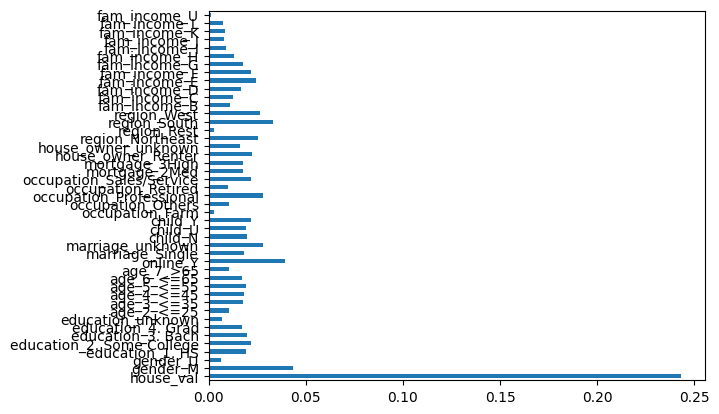

In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

house_val                    0.243190
gender_M                     0.043461
gender_U                     0.006203
education_1. HS              0.019251
education_2. Some College    0.021761
education_3. Bach            0.019711
education_4. Grad            0.017075
education_unknown            0.006673
age_2_<=25                   0.010440
age_3_<=35                   0.017806
age_4_<=45                   0.017957
age_5_<=55                   0.019253
age_6_<=65                   0.017003
age_7_>65                    0.010653
online_Y                     0.039425
marriage_Single              0.018018
marriage_unknown             0.027692
child_N                      0.019946
child_U                      0.018934
child_Y                      0.021719
occupation_Farm              0.002683
occupation_Others            0.010467
occupation_Professional      0.028043
occupation_Retired           0.009766
occupation_Sales/Service     0.022011
mortgage_2Med                0.017564
mortgage_3Hi

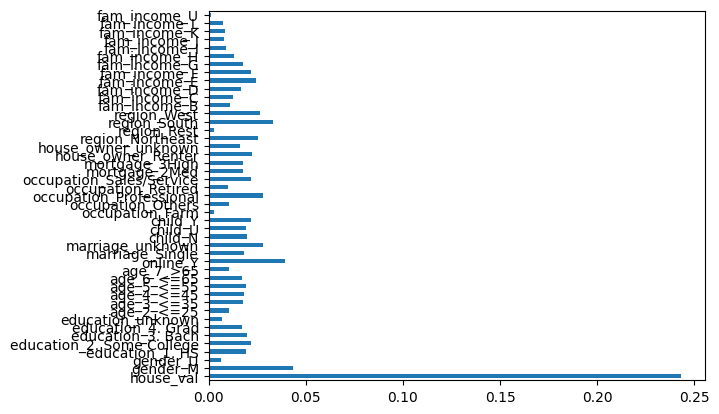

OOB R2 score: 0.66225
OOB MSE score: 0.21709590637786344


In [ ]:
# RF Model
rf_modelWithoob = RandomForestClassifier(random_state=42, oob_score=True)

# RF model fit with OOB
rf_modelWithoob.fit(X_train, y_train)


# Obtain feature importances and plot them
importances = pd.Series(rf_modelWithoob.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

# Evaluate OOB score
print('OOB R2 score:', rf_modelWithoob.oob_score_)

# Compute OOB predictions
oob_predictions = rf_modelWithoob.oob_decision_function_

# Extract probability of positive class (class index 1)
oob_positive_probs = oob_predictions[:, 1]

# Compute OOB MSE score
oob_mse = mean_squared_error(y_train, oob_positive_probs)
print('OOB MSE score:', oob_mse)

In [ ]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('rf_model', rf_model)
])

In [ ]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'rf_model__n_estimators': [100, 200, 300],
    'rf_model__max_depth': [None, 5, 10, 15],
    'rf_model__min_samples_split': [2, 5, 10],
    'rf_model__min_samples_leaf': [1, 2, 4]
}



In [ ]:
# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid_rf, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
best_rf = grid_search.best_estimator_
print(best_rf)

In [ ]:
y_pred_after_tuning = best_rf.predict(X_test)
report_after_tuning = classification_report(y_test, y_pred_after_tuning)
print("\nPerformance Metrics After Hyperparameter Tuning:")
print(report_after_tuning)

In [ ]:
# Get the predicted probabilities
y_score = best_clf.predict_proba(X_test)[:, 1]

# Compute the ROC Curve and ROC Area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Compute the Precision-Recall Curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

# Compute the Calibration Curve
prob_true, prob_pred = [], []
bins = np.linspace(0, 1, 10)
for i in range(len(bins)-1):
    mask = (y_score >= bins[i]) & (y_score < bins[i+1])
    if sum(mask) > 0:
        prob_true.append(np.mean(y_test[mask]))
        prob_pred.append(np.mean(y_score[mask]))

# Compute the Lift Curve
lift_values = []
thresholds = np.linspace(0, 1, 100)
for threshold in thresholds:
    y_pred = (y_score >= threshold).astype(int)
    lift_values.append(np.mean(y_pred) / np.mean(y_test))

# Compute the F1 Score Curve
f1_scores = []
for threshold in thresholds:
    y_pred = (y_score >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))

# Compute the Gain Curve
sorted_indices = np.argsort(y_score)[::-1]
y_score_sorted = y_score[sorted_indices]
y_test_sorted = np.array(y_test)[sorted_indices]
cumulative_gains = np.cumsum(y_test_sorted) / np.sum(y_test_sorted)

# Compute the Confusion Matrix
y_pred_binary = (y_score >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Compute the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_clf, X, y, cv=5)

# Create a Panel of Plots
fig, axes = plt.subplots(4, 3, figsize=(18, 12))

# Plot the ROC Curve
axes[0, 0].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[0, 0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axes[0, 0].set_xlim([0.0, 1.0])
axes[0, 0].set_ylim([0.0, 1.05])
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curve')
axes[0, 0].legend(loc="lower right")

# Plot the Lift Curve
axes[0, 1].plot(thresholds, lift_values, color='red', lw=2, label='Lift curve')
axes[0, 1].set_xlabel('Threshold')
axes[0, 1].set_ylabel('Lift')
axes[0, 1].set_title('Lift Curve')
axes[0, 1].legend(loc="lower right")

# Plot the Precision-Recall Curve
axes[0, 2].step(recall, precision, color='blue', where='post')
axes[0, 2].set_xlabel('Recall')
axes[0, 2].set_ylabel('Precision')
axes[0, 2].set_title('Precision-Recall Curve')
axes[0, 2].set_ylim([0.0, 1.05])
axes[0, 2].set_xlim([0.0, 1.0])
axes[0, 2].legend(loc="lower left")

# Plot the Calibration Plot
axes[1, 0].plot(prob_pred, prob_true, marker='o', linewidth=2, label='Calibration plot')
axes[1, 0].set_xlabel('Predicted Probability')
axes[1, 0].set_ylabel('True Probability')
axes[1, 0].set_title('Calibration Plot')
axes[1, 0].legend(loc="lower right")

# Plot the Confusion Matrix
conf_matrix_img = axes[1, 1].matshow(conf_matrix, cmap=plt.cm.Blues)
axes[1, 1].set_title('Confusion Matrix')
plt.colorbar(conf_matrix_img, ax=axes[1, 1])
axes[1, 1].set_xlabel('Predicted labels')
axes[1, 1].set_ylabel('True labels')

# Add Text Annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axes[1, 1].text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > np.max(conf_matrix) / 2. else "black")

# Plot the Learning Curve
axes[1, 2].plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
axes[1, 2].plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
axes[1, 2].set_xlabel("Training examples")
axes[1, 2].set_ylabel("Score")
axes[1, 2].set_title("Learning Curve")
axes[1, 2].legend(loc="best")

# Plot the F1 Score Curve
axes[2, 0].plot(thresholds, f1_scores, color='purple', lw=2, label='F1 Score curve')
axes[2, 0].set_xlabel('Threshold')
axes[2, 0].set_ylabel('F1 Score')
axes[2, 0].set_title('F1 Score Curve')
axes[2, 0].legend(loc="lower right")

# Plot the Gain Curve
axes[2, 1].plot(np.linspace(0, 1, len(cumulative_gains)), cumulative_gains, color='green', lw=2, label='Gain curve')
axes[2, 1].set_xlabel('Percentage of Samples')
axes[2, 1].set_ylabel('Cumulative Gains')
axes[2, 1].set_title('Gain Curve')
axes[2, 1].legend(loc="lower right")

# Bar Plot for Support
y_test_class = y_test.astype('category') # Convert the class labels to categorical type
support = y_test_class.value_counts()

axes[2, 2].bar(support.index.astype(str), support.values, color='skyblue')
axes[2, 2].set_xlabel('Class Label')
axes[2, 2].set_ylabel('Support')
axes[2, 2].set_title('Support for Each Class')

# Plot for Accuracy
axes[3, 0].plot(thresholds, accuracies, color='blue')
axes[3, 0].set_xlabel('Threshold')
axes[3, 0].set_ylabel('Accuracy')
axes[3, 0].set_title('Accuracy Plot')

plt.tight_layout()
plt.show()

In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_model = svm.SVC()

In [ ]:
hyperparameters = {'kernel': ['linear'],
                   'C': [0.01, 0.1],
                   'gamma': [0.01, 0.1]}

In [ ]:
grid_search = GridSearchCV(svm_model, hyperparameters, cv=5) #scoring='roc_auc'
grid_search.fit(X_train_scaled, y_train)

In [ ]:
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n')
y_pred = best_classifier.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

In [ ]:
import matplotlib.pyplot as plt
importances = pd.Series(best_classifier.coef_[0], index=X_train.columns)
print(importances,'\n')
importances=abs(importances)
print(importances,'\n')
importances.plot(kind='barh')
plt.show()